<a href="https://colab.research.google.com/github/akhil6174/ML-projects/blob/main/Crop_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# load dataset
df=pd.read_csv("Crop_recommendation.csv")
df.head(2)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice


In [ ]:
df.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
#preprocessing of data
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


features:-ph,N,P,K,rainfall,tempreture&humidity
target->**label** **bold text**

In [ ]:
#encoding
le=LabelEncoder()
df['label']=le.fit_transform(df['label'])
df["label"]

,label
0,20
1,20
2,20
3,20
4,20
...,...
2195,5
2196,5
2197,5
2198,5


In [ ]:
#label mapping
for index,label in enumerate(le.classes_):
  print(f"{label}->{index}")

apple->0
banana->1
blackgram->2
chickpea->3
coconut->4
coffee->5
cotton->6
grapes->7
jute->8
kidneybeans->9
lentil->10
maize->11
mango->12
mothbeans->13
mungbean->14
muskmelon->15
orange->16
papaya->17
pigeonpeas->18
pomegranate->19
rice->20
watermelon->21


In [ ]:
#imbalance
df.label.value_counts()

,count
label,
20,100
11,100
3,100
9,100
18,100
13,100
14,100
2,100
10,100


In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [ ]:
scaler=StandardScaler()
scaler_values=scaler.fit_transform(df[['temperature','humidity','ph','rainfall']])

print(scaler_values)

In [ ]:
#array->df
scaled_df=pd.DataFrame(scaler_values,columns=['temperature','humidity','ph','rainfall'])
#reseting index
scaled_df.index=df.index
#replace scaled df to original df
df[['temperature','humidity','ph','rainfall']]=scaled_df

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,-0.935587,0.472666,0.043302,1.810361,20
1,85,58,41,-0.759646,0.397051,0.734873,2.242058,20
2,60,55,44,-0.515898,0.486954,1.771510,2.921066,20
3,74,35,40,0.172807,0.389805,0.660308,2.537048,20
4,78,42,42,-1.083647,0.454792,1.497868,2.898373,20


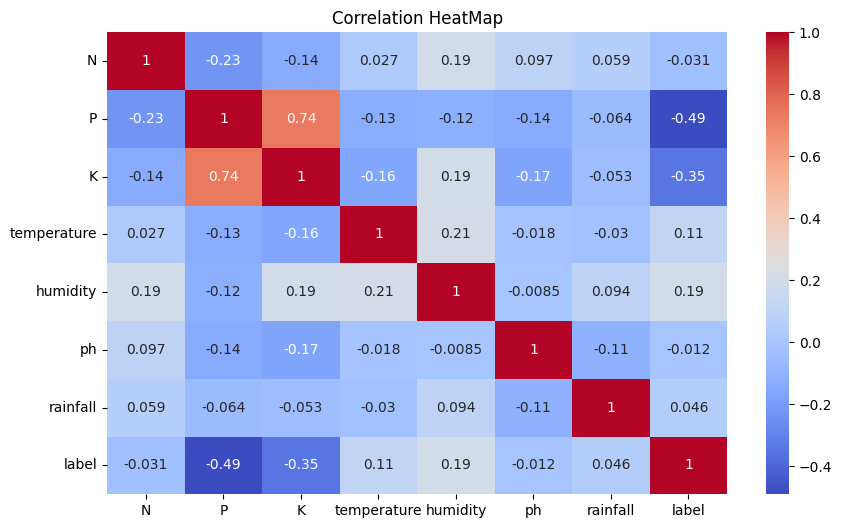

In [ ]:
#check map
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title('Correlation HeatMap')
plt.show()

Creating **Model**

In [ ]:
#spliting dataset infeatures and target var
X=df[['N','P','K','temperature','humidity','ph','rainfall']]
y=df['label']

In [ ]:
#split train test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [ ]:
#train model
model=RandomForestClassifier(random_state=45)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=45)

In [ ]:
y_pred=model.predict(X_test)
print(f"Classification report->\n{classification_report(y_test,y_pred)}")
print(f"Accuracy->{accuracy_score(y_test,y_pred)}")

Classification report->
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
   

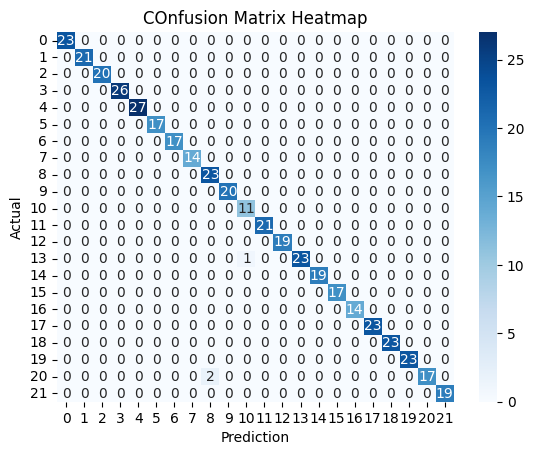

In [ ]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('COnfusion Matrix Heatmap')
plt.show()